Sentiment Analysis using Feed Forward Neural network
----

In [1]:
import sentiment_utils as sutils
import numpy as np
import nltk
nltk.download('wordnet')

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer
import sklearn


[nltk_data] Downloading package punkt to /Users/acehunter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/acehunter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2023-10-27 21:05:10.207425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# define constants for the files we are using
TRAIN_FILE = "Book1.txt"
DEV_FILE = "test data.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
nltk.download('wordnet')
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# you may use either your sparse vectors or sklearn's
# CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later
vocab = sutils.create_index(train_tups[0])

train_reviews = []
for review in train_tups[0]:
  train_reviews.append(" ".join(review))
train_labels = train_tups[1]
dev_reviews = []
for review in dev_tups[0]:
    dev_reviews.append(" ".join(review))
dev_labels = dev_tups[1]

# multinomial featurization
mul_vectorizer = CountVectorizer(tokenizer= None, preprocessor= None,
                                 stop_words=None, vocabulary=vocab)
X_train_mul = mul_vectorizer.fit_transform(train_reviews)
X_dev_mul = mul_vectorizer.transform(dev_reviews)

# binary featurization
bin_vectorizer = CountVectorizer(binary=True, tokenizer= None, preprocessor= None,
                                 stop_words=None, vocabulary=vocab)
X_train_bin = bin_vectorizer.fit_transform(train_reviews)
X_dev_bin = bin_vectorizer.transform(dev_reviews)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/acehunter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from keras.optimizers import SGD

def nn_model(training_data):
  model = Sequential()

  # model.add(Dense(units=128, input_dim=training_data.shape[1],
  #               activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dense(units=64, activation='relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.5))

  # model.add(Dense(units=1, activation='sigmoid'))

  # model.compile(loss='binary_crossentropy', optimizer='sgd',
  #             metrics=['accuracy'])

  model.add(Dense(units=256, input_dim=training_data.shape[1], activation='tanh'))
  model.add(Dropout(0.4))
  model.add(Dense(units=128, activation='tanh'))
  model.add(Dropout(0.4))
  model.add(Dense(units=64, activation='tanh'))
  model.add(Dropout(0.4))
  model.add(Dense(units=32, activation='tanh'))
  model.add(Dropout(0.4))
  model.add(Dense(units=1, activation='sigmoid'))

  optimizer = SGD(learning_rate=0.02)
  model.compile(loss='binary_crossentropy',
                optimizer=optimizer, metrics=['accuracy'])


  return model

In [4]:
from keras.src.optimizers import Adam
from keras.src.layers import BatchNormalization

# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each
# hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to

# multinomial
multi_model = nn_model(X_train_mul)
multi_model.summary()

# binary
model_bin = nn_model(X_train_bin)
model_bin.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3898624   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

How many trainable parameters does your model have? __4998913__

In [5]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>,
# (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array
# For the multi_model (assuming you're using a neural network model for 'x_train_mul' and 'x_dev_mul')
x_train_mul = X_train_mul.toarray()
x_train_bin = X_train_bin.toarray()
sutils.metrics_fun(list(zip(x_train_mul, train_labels)), dev_labels, X_dev_mul, classifier_type='Neural Network', nn_model=multi_model, nn_epochs=20, nn_batch_size=32)

# For the model_bin (assuming you're using a neural network model for 'x_train_bin' and 'x_dev_bin')
sutils.metrics_fun(list(zip(x_train_bin, train_labels)), dev_labels, X_dev_bin, classifier_type='Neural Network', nn_model=model_bin, nn_epochs=20, nn_batch_size=64)



Epoch 1/20
512/512 [==============================] - 7s 12ms/step - loss: 0.5408 - accuracy: 0.7318 - val_loss: 0.3773 - val_accuracy: 0.8413
Epoch 2/20
512/512 [==============================] - 6s 12ms/step - loss: 0.3733 - accuracy: 0.8411 - val_loss: 0.3725 - val_accuracy: 0.8232
Epoch 3/20
512/512 [==============================] - 7s 13ms/step - loss: 0.3207 - accuracy: 0.8684 - val_loss: 0.3051 - val_accuracy: 0.8688
Epoch 4/20
512/512 [==============================] - 7s 13ms/step - loss: 0.2906 - accuracy: 0.8845 - val_loss: 0.3075 - val_accuracy: 0.8645
Epoch 5/20
512/512 [==============================] - 6s 12ms/step - loss: 0.2731 - accuracy: 0.8983 - val_loss: 0.2969 - val_accuracy: 0.8674
Epoch 6/20
512/512 [==============================] - 7s 13ms/step - loss: 0.2510 - accuracy: 0.9056 - val_loss: 0.3895 - val_accuracy: 0.8394
Epoch 7/20
512/512 [==============================] - 7s 14ms/step - loss: 0.2356 - accuracy: 0.9134 - val_loss: 0.2971 - val_accuracy: 0.8774

(0.8587521663778163, 0.898458748866727, 0.8781568453699601, 0.8692965779467681)

In [6]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer
# Make predictions on the development set
# binary prfc
binary_predictions_nn = []

print("Binary PRFA for Neural Network")

# Convert dev_labels to strings
dev_labels = [str(label) for label in dev_labels]

for features in X_dev_bin:
    prediction = model_bin.predict(features.reshape(1, -1))
    binary_predictions_nn.append(1 if prediction[0][0] > 0.5 else 0)
_, _, bin_f1_nn, _ = sutils.get_prfa(dev_labels, [str(pred) for pred in binary_predictions_nn], True)
print("------")

multi_predictions_nn = []
print("Multinomial PRFA for Neural Network")

# Convert dev_labels to strings
dev_labels = [str(label) for label in dev_labels]

for features in X_dev_mul:
    prediction = multi_model.predict(features.reshape(1, -1))
    multi_predictions_nn.append(1 if prediction[0][0] > 0.5 else 0)
_, _, multi_f1_nn, _ = sutils.get_prfa(dev_labels, [str(pred) for pred in multi_predictions_nn], True)
print("------")


Binary PRFA for Neural Network
1/1 [==============================] - 0s 5ms/step
Precision: 0.8588
Recall: 0.8985
F1 Score: 0.8782
Accuracy: 0.8693
------
Multinomial PRFA for Neural Network
1/1 [==============================] - 0s 5ms/step
Precision: 0.9176
Recall: 0.8377
F1 Score: 0.8758
Accuracy: 0.8755
------


In [7]:
# For multi_model (assuming you've trained a neural network for X_train_mul and X_dev_mul):
# Assuming you have dev_labels as numpy array
dev_Y = np.array([int(label) for label in dev_labels])
results = multi_model.evaluate(X_dev_mul, dev_Y, verbose=1)

# The 'results' variable now contains the loss and accuracy on the dev set
loss = results[0]
accuracy = results[1]

print(f"Loss on dev set: {loss}")
print(f"Accuracy on dev set: {accuracy}")

# Assuming that dev_labels is a list of float values (0.0 or 1.0)

# loss_bin, accuracy_bin = model_bin.evaluate(x_dev_bin, np.array(dev_labels), verbose=1)
#
# # For model_bin (assuming you've trained a neural network for X_train_bin and X_dev_bin):
# x_dev_bin = X_dev_bin.toarray()  # Convert to dense array
# y_dev_bin = np.array(dev_labels)
# loss_bin, accuracy_bin = model_bin.evaluate(x_dev_bin, y_dev_bin, verbose=1)
# print("Loss for Binary Model:", loss_bin)
# print("Accuracy for Binary Model:", accuracy_bin)

66/66 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8755
Loss on dev set: 0.36317726969718933
Accuracy on dev set: 0.875475287437439


Epoch 1/3
52/52 [==============================] - 2s 34ms/step - loss: 0.1840 - accuracy: 0.9395 - val_loss: 0.3580 - val_accuracy: 0.8726
Epoch 2/3
52/52 [==============================] - 1s 28ms/step - loss: 0.1375 - accuracy: 0.9566 - val_loss: 0.3768 - val_accuracy: 0.8655
Epoch 3/3
66/66 [==============================] - 1s 8ms/step
Epoch 1/3
103/103 [==============================] - 2s 24ms/step - loss: 0.1419 - accuracy: 0.9447 - val_loss: 0.4144 - val_accuracy: 0.8598
Epoch 2/3
103/103 [==============================] - 2s 23ms/step - loss: 0.1047 - accuracy: 0.9664 - val_loss: 0.3814 - val_accuracy: 0.8698
Epoch 3/3
66/66 [==============================] - 1s 9ms/step
Epoch 1/3
154/154 [==============================] - 4s 23ms/step - loss: 0.1499 - accuracy: 0.9499 - val_loss: 0.4197 - val_accuracy: 0.8650
Epoch 2/3
154/154 [==============================] - 3s 22ms/step - loss: 0.1127 - accuracy: 0.9609 - val_loss: 0.4812 - val_accuracy: 0.8512
Epoch 3/3
66/66 [=========

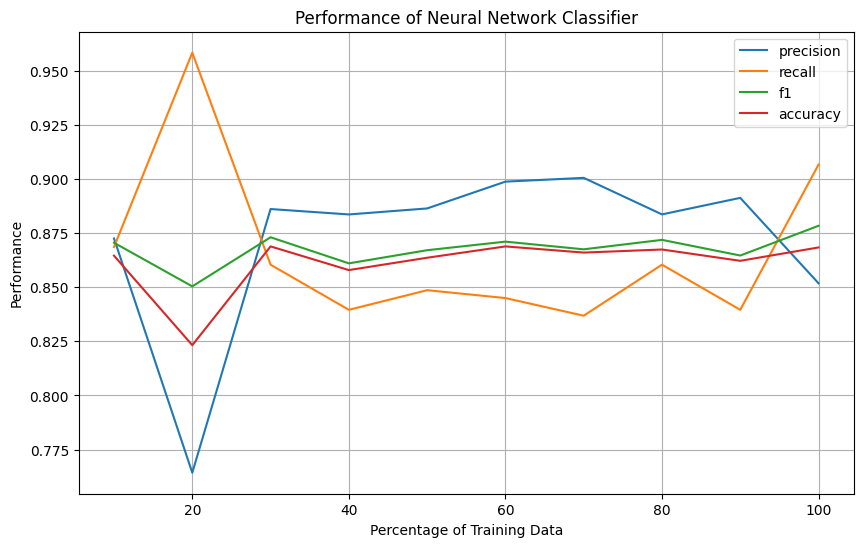

Epoch 1/3
52/52 [==============================] - 1s 29ms/step - loss: 0.1606 - accuracy: 0.9462 - val_loss: 0.3570 - val_accuracy: 0.8726
Epoch 2/3
52/52 [==============================] - 1s 26ms/step - loss: 0.1237 - accuracy: 0.9639 - val_loss: 0.3565 - val_accuracy: 0.8731
Epoch 3/3
66/66 [==============================] - 1s 8ms/step
Epoch 1/3
103/103 [==============================] - 2s 22ms/step - loss: 0.1290 - accuracy: 0.9548 - val_loss: 0.3730 - val_accuracy: 0.8698
Epoch 2/3
103/103 [==============================] - 2s 21ms/step - loss: 0.1082 - accuracy: 0.9673 - val_loss: 0.3877 - val_accuracy: 0.8702
Epoch 3/3
66/66 [==============================] - 1s 8ms/step
Epoch 1/3
154/154 [==============================] - 3s 21ms/step - loss: 0.1057 - accuracy: 0.9635 - val_loss: 0.4097 - val_accuracy: 0.8717
Epoch 2/3
154/154 [==============================] - 3s 21ms/step - loss: 0.0908 - accuracy: 0.9725 - val_loss: 0.4168 - val_accuracy: 0.8660
Epoch 3/3
66/66 [=========

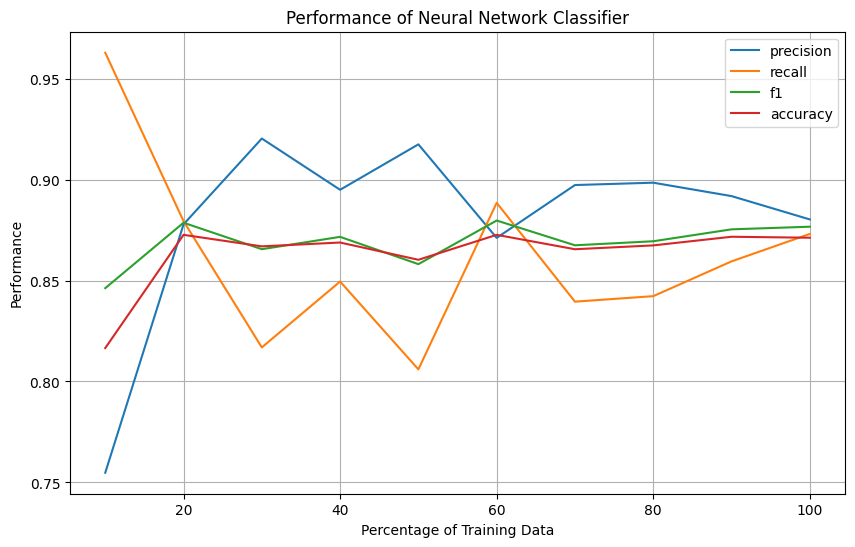

In [8]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)

# For Binary Model
train_feats_bin = X_train_bin.toarray()
dev_feats_bin = X_dev_bin
train_labels_bin = np.array(train_labels)
model_kind_bin = 'Neural Network'

# For Multinomial Model
train_feats_mul = X_train_mul.toarray()
dev_feats_mul = X_dev_mul
train_labels_mul = np.array(train_labels)
model_kind_mul = 'Neural Network'

# Create the graphs for the binary model
train_data_bin = list(zip(train_feats_bin, train_labels_bin))
sutils.create_training_graph(train_data_bin, train_tups, dev_feats_bin, dev_labels, model_kind_bin, None, False, model_bin)

# Create the graphs for the multinomial model
train_data_mul = list(zip(train_feats_mul, train_labels_mul))
sutils.create_training_graph(train_data_mul, train_tups, dev_feats_mul, dev_labels, model_kind_mul, None, False, multi_model)




Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: __12__
- multinomial features: __0.7917__
- binarized features: __0.8152__